# FOI requests data analysis

As of February 20, 2022, PST

In this notebook, we use the CSV file generated by the auto-scraper to make our analysis of FOI requests.

Remember that the **foi-ph-scraper** ideally scrapes new information from the website every Sunday of the week. The file generated is in a separate repository, which I will just read in here.

In [1]:
import pandas as pd
import re
import requests
from plotnine import *

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Read df and clean it

Read through the CSV, remove unnecessary columns, look for NaN values and duplicates, convert to datetime before you go through the data.

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 1000)
df = pd.read_csv('foi_final.csv')
df.tail(10)

/Users/prinzmagtulis/.pyenv/versions/3.10.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.


,Unnamed: 0,agency,date,title,status,purpose,period_covered,link,reason_denial
101400,101400,PH,2022-02-20,Philhealth,PENDING,Philhealth number,02/20/2022 - 02/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
101401,101401,DOH,2022-02-20,Correction of my middle name for Vax certificate,PENDING,Correction of my middle name for Vax certificate,07/13/2021 - 09/20/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
101402,101402,NTC,2022-02-20,Track my stolen phone,PENDING,To track and take it back to me.,02/19/2022 - 02/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
101403,101403,DSWD,2022-02-20,Cash assisstance for maternity benefit,PENDING,In return of our medical expensses,01/12/2022 - 01/14/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
101404,101404,DSWD,2022-02-20,The number of registered NGOs that are for aba...,PENDING,Research and Development,02/20/2022 - 02/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
101405,101405,DICT,2022-02-20,In need for online class,PENDING,Need laptop for online class,02/20/2022 - 02/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
101406,101406,OVP,2022-02-20,For Chemotherapy,PENDING,For Chemotherapy Treatment,02/20/2022 - 02/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
101407,101407,BIR,2022-02-20,Income Tax Return Copy,PENDING,Personal Use,01/01/2021 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
101408,101408,DOH,2022-02-20,number of patients with cardio-vascular diseas...,PENDING,Thesis Proposal Of Regional Heart Center in Ca...,02/20/2022 - 02/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
101409,101409,NTC,2022-02-20,Threat text msgs,PENDING,To trace who and where is this txter who sendi...,11/15/2021 - 02/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Drop 'Unnamed' column

In [3]:
df=df.drop('Unnamed: 0', axis=1)
df

,agency,date,title,status,purpose,period_covered,link,reason_denial
0,DOTr,2016-11-25,clark green city update,CLOSED,for update,11/25/2016 - 11/25/2016,NaN,—
1,PSA,2016-11-25,"The amount of yellowfin, skipjack, bigeye tuna...",DENIED,Research and Development,01/01/2010 - 12/31/2015,NaN,—
2,PSA,2016-11-25,Breakdown of Religious Affiliations of Filipin...,SUCCESSFUL,Research,01/01/1990 - 11/25/2016,NaN,—
3,NAP,2016-11-25,History of Masbate Province,CLOSED,Research and General Information,01/01/1521 - 11/25/2016,NaN,—
4,PCOO,2016-11-25,HIRING GOVERNMENT CAREER EMPLOYEES (RANK AND F...,PARTIALLY SUCCESSFUL,PUBLIC INFORMATION,11/25/2016 - 11/25/2016,NaN,—
...,...,...,...,...,...,...,...,...
101405,DICT,2022-02-20,In need for online class,PENDING,Need laptop for online class,02/20/2022 - 02/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
101406,OVP,2022-02-20,For Chemotherapy,PENDING,For Chemotherapy Treatment,02/20/2022 - 02/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
101407,BIR,2022-02-20,Income Tax Return Copy,PENDING,Personal Use,01/01/2021 - 12/31/2021,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN
101408,DOH,2022-02-20,number of patients with cardio-vascular diseas...,PENDING,Thesis Proposal Of Regional Heart Center in Ca...,02/20/2022 - 02/20/2022,https://www.foi.gov.ph/requests/aglzfmVmb2ktcG...,NaN


## Convert to datetime

In [4]:
df.dtypes

agency            object
date              object
title             object
status            object
purpose           object
period_covered    object
link              object
reason_denial     object
dtype: object

In [5]:
df.date = pd.to_datetime(df.date)

In [6]:
df.dtypes

agency                    object
date              datetime64[ns]
title                     object
status                    object
purpose                   object
period_covered            object
link                      object
reason_denial             object
dtype: object

## Check for duplicates

In [7]:
df.duplicated().value_counts()

False    99261
True      2149
dtype: int64

## Looking into the NaNs

We look for null values and whether they account for significant number of the data.

In [8]:
df.isna().sum()

agency                0
date                  0
title                 2
status                0
purpose               1
period_covered        0
link              91580
reason_denial      9830
dtype: int64

Interpretation: The **link** column have over 91,000 null values. This is because a large part of the data in our df came from an existing CSV maintained by the government. The same goes for **reason_denial.**

You can find the CSV here: https://docs.google.com/spreadsheets/d/1kblO1_-gL65qXu_EJJBvc59UUHBQ7K3c/edit?fbclid=IwAR332h3xXbevTcnDiKQwKWldsod3kPP3J0T9_5NSXALgFI7XZPyIxMuqXg0#gid=875187444

The data is updated quarterly. We merged this data early on with the scraped data from the website.

## Analysis

Now that we have all the requests contained in one file, we can now analyze them, still using pandas.

## How much of the requests are granted or denied?

In [9]:
df.status.value_counts(normalize=True) * 100

SUCCESSFUL                41.820333
DENIED                    26.060546
PENDING                   11.048220
PARTIALLY SUCCESSFUL       7.555468
ACCEPTED                   4.711567
CLOSED                     3.447392
AWAITING CLARIFICATION     2.690070
REFERRED                   1.621142
PROCESSING                 1.036387
EXTENDED                   0.008875
Name: status, dtype: float64

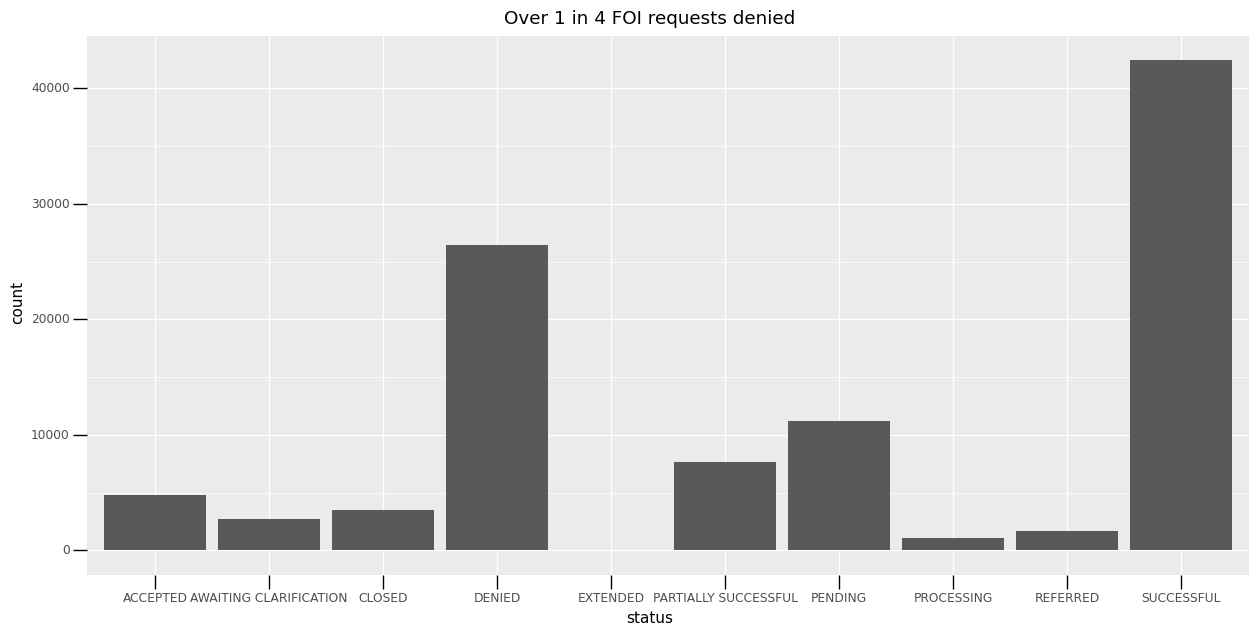

<ggplot: (303306671)>

In [35]:
(
    ggplot(df) + 
    geom_bar(aes(x="status")) + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Over 1 in 4 FOI requests denied")
)

Note: We are still seeking clarification from PCOO on what **CLOSED** means. Meanwhile, over one in four FOI requests are denied by agencies. Over half are **successful** or **partially sucessful**. 

## Which agencies get the most FOI requests?

In [11]:
df.agency.value_counts().head(10)

DOH      7690
PSA      5960
DOLE     5409
SSS      4356
BIR      4221
OWWA     4116
DepEd    4044
DSWD     3714
NTC      3131
DPWH     2634
Name: agency, dtype: int64

The Department of Health, Philippine Statistics Authority and the labor department get the most requests.

## Which agencies deny the most requests?

The Bureau of Internal Revenue tops the list, although a deeper probe would show most of the denials were a result of requests for personal tax records, which are not for public consumption.

In [12]:
df[df.status=="DENIED"].agency.value_counts().head(10)

BIR     2624
DSWD    2324
DENR    1297
DOH     1085
DTI     1065
DOLE     829
DOTr     787
HDMF     680
DILG     600
SSS      515
Name: agency, dtype: int64

# Drilling down on specific agencies and requests

We select a few agencies and search in their request files some of the most common requests by **title** as well as some of the most denials. 

## DOH: Vaccination certificates

In [13]:
df[df.agency=="DOH"].title.value_counts().head(20)

Vaccination Certificate                                                                         222
Vaxcert                                                                                          91
Vaccine Certificate                                                                              60
VaxCert                                                                                          58
Vaccination certificate                                                                          54
Vax Cert                                                                                         40
VAXCERT                                                                                          35
Vax Certificate                                                                                  34
Vaccination Card                                                                                 33
VACCINATION CERTIFICATE                                                                          32


In [14]:
vax = ["Vaccination Certificate", "Vaxcert", "VaxCert", "Vaccination certificate", "Vax Cert", "VAXCERT", "VAX CERT", "Vax Certificate", "Vax certificate", "VACCINATION CERTIFICATE", "Vax cert", "VaxCertPH", "Vax Cert PH", "vax cert", "Vax cert request", "Vax Cert Request", "Vaccination Card", "Vax card", "vaccination card", "Vaccine certificate", "vaccine certificate"]
df_vax = df[df['title'].isin(vax)].reset_index(drop=True)
df_vax.count()

agency            799
date              799
title             799
status            799
purpose           799
period_covered    799
link              353
reason_denial     446
dtype: int64

Interpretation: One in 10 DOH requests from 2016 were to request for vaccination certificates.

## DSWD: Social amelioration program

This is the P275-billion pandemic relief program by the government in 2020 that gave dole outs to poor families. The program were given in two tranches and were marred by significant delays and other irregularities.

In [15]:
sap = ["SAP", "SAP 2nd tranche", "Sap 2nd tranche", "Social Amelioration Program", "Social amelioration program", "sap 2nd tranche", "SAP 2nd tranche", "2nd tranche", "DSWD SAP", "SAP 2ND TRANCHE", "Sap 2nd Tranche", "SAP 1st tranche", "SAP first tranche", "SAP 1ST TRANCHE", "Sap"]
df_sap = df[df['title'].isin(sap)].reset_index(drop=True)
df_sap[df_sap.status=="DENIED"].head(10)

,agency,date,title,status,purpose,period_covered,link,reason_denial
0,DSWD,2020-04-09,Social amelioration program,DENIED,Personal information only,04/09/2020 - 04/09/2020,NaN,—
1,DSWD,2020-04-21,Social Amelioration Program,DENIED,Transparency purposes to my kabarangay,04/01/2020 - 04/21/2020,NaN,—
2,DSWD,2020-04-21,Sap,DENIED,Solo parent,04/08/2020 - 04/21/2020,NaN,—
3,DSWD,2020-04-23,Social Amelioration Program,DENIED,Validation and Confirmation,04/23/2020 - 04/23/2020,NaN,—
4,DSWD,2020-04-25,Social Amelioration Program,DENIED,To known the list of beneficiaries of Social A...,03/01/2020 - 04/25/2020,NaN,—
5,DSWD,2020-04-27,DSWD SAP,DENIED,To know the status of DSWD SAP in our Barangay.,04/27/2020 - 04/27/2020,NaN,—
6,DSWD,2020-04-27,Social Amelioration Program,DENIED,Transparency,04/19/2020 - 04/27/2020,NaN,—
7,DSWD,2020-05-01,SAP,DENIED,SAP APPLICATION,05/01/2020 - 05/01/2020,NaN,—
8,DSWD,2020-05-01,Social Amelioration Program,DENIED,Social Amelioration Program,03/16/2020 - 04/30/2020,NaN,incomplete-request
9,DSWD,2020-05-03,Sap,DENIED,Applying for special amelioration program,03/21/2020 - 04/21/2020,NaN,—


Interpretation: Most requests for SAP were denied and were deemed an "invalid request."

In [16]:
df_sap.count()
#180 requests about SAP.

agency            180
date              180
title             180
status            180
purpose           180
period_covered    180
link                1
reason_denial     179
dtype: int64

## OVP: Any type of "assistance"

The office is known for its **Angat Buhay** program that helps the poor.

In [17]:
df[df.agency=="OVP"].title.str.contains("assistance", regex=False, case=False).value_counts()

False    449
True     290
Name: title, dtype: int64

Interpretation: Nearly 40% of OVP FOI requests mention some form of "assistance".

## BIR: Tax identification number or TIN

Tax matters are generally protected by privacy laws in the Philippines. But that did not stop some people to request for them through FOI.

In [18]:
#df_final[df_final.title=="Income Tax Return"]
tax = ['Income Tax Return', 'ITR','BIR 2316', 'TIN Verification', 'TIN VERIFICATION', 'BIR Form 2316', 'Income tax return', 'TIN', 'INCOME TAX RETURN', 'Form 2316', 'TIN NUMBER', 'tin number', 'TIN verification']
df_tax = df[df['title'].isin(tax)].reset_index(drop=True)
df_tax.head(7)

,agency,date,title,status,purpose,period_covered,link,reason_denial
0,BIR,2019-03-03,tin number,SUCCESSFUL,employment,03/03/2007 - 03/03/2010,NaN,—
1,BIR,2019-03-07,TIN,SUCCESSFUL,Lot sale,01/01/2005 - 03/07/2019,NaN,—
2,BIR,2019-06-12,TIN,SUCCESSFUL,Opening of Bank account,06/12/2019 - 06/12/2019,NaN,—
3,BIR,2019-09-26,TIN,SUCCESSFUL,For issuance of tin ID,03/29/2019 - 06/22/2019,NaN,—
4,BIR,2019-10-11,tin number,DENIED,employment,09/05/2019 - 10/10/2019,NaN,incomplete-request
5,BIR,2019-11-29,BIR 2316,PARTIALLY SUCCESSFUL,BANK LOAN,01/01/2018 - 12/31/2018,NaN,—
6,BIR,2019-12-26,TIN,DENIED,For verification,07/26/2019 - 12/26/2019,NaN,—


In [19]:
df_tax.status.value_counts(normalize=True) *100

DENIED                    50.957156
AWAITING CLARIFICATION    35.642662
SUCCESSFUL                 5.378304
PENDING                    2.825889
ACCEPTED                   2.278943
PARTIALLY SUCCESSFUL       1.458523
CLOSED                     0.729262
REFERRED                   0.455789
PROCESSING                 0.273473
Name: status, dtype: float64

# Know each agencies' performance 

Just changed the name of the agency in brackets.

In [20]:
df[df.agency=="OP"]
#There were some requests for SALN.

,agency,date,title,status,purpose,period_covered,link,reason_denial
2594,OP,2017-12-01,Total cost/expenses for the foreign trips of P...,PENDING,For research purposes for my year-end report f...,01/01/2017 - 12/01/2017,NaN,—
2630,OP,2017-12-04,Cost of President Duterte's foreign trips in h...,PENDING,News research,07/01/2016 - 07/01/2017,NaN,—
2635,OP,2017-12-05,Updates on the appeals of suspended and closed...,PENDING,Research,02/02/2017 - 12/05/2017,NaN,—
2734,OP,2017-12-24,2018 General Appropriations Act,PENDING,Factual basis in research and review of certai...,12/24/2017 - 12/24/2017,NaN,—
2750,OP,2017-12-30,Executive Order 126 dated 1959,PENDING,HISTORY,12/30/2017 - 12/30/2017,NaN,—
3057,OP,2018-01-31,NSC Group Photos with Living Former Presidents,PENDING,Research and Archive purposes.,07/27/2016 - 07/27/2016,NaN,—
3207,OP,2018-02-11,Documentary proof or evidence of President Dut...,PENDING,Research for Graduate School class.,03/28/1945 - 02/11/2018,NaN,—
3209,OP,2018-02-11,What is the counterpart of the CIA in the Phil...,PENDING,Research,02/11/2018 - 02/11/2018,NaN,—
3214,OP,2018-02-11,Breakdown of War Materiel used by the AFP in t...,PENDING,Research for Graduate School class.,05/23/2017 - 11/23/2017,NaN,—
3257,OP,2018-02-13,Actual Expenses of ASEAN 2017 budget,PENDING,Research purposes,01/01/2017 - 01/01/2018,NaN,—


## Top reasons for denial

Applicable only to data as of December 2021.

In [21]:
df.reason_denial.value_counts(dropna=False)
#"-" means it's not applicable since the request was not denied.

—                               77998
NaN                              9830
wrong-agency                     7043
incomplete-request               2789
invalid-request                  2107
information-available-online     1640
exceptions                          2
privacy                             1
Name: reason_denial, dtype: int64

# SALN requests, anyone?

Stands for "Statements of Assets, Liabilities and Net Worth" filed by public officials every year.

In [22]:
df.title.str.contains("SALN", regex=False, case=False).value_counts()

False    101146
True        262
Name: title, dtype: int64

Over 200 requests using the exact words "SALN" on the FOI portal. Below, we use a regex pattern to screen this more.

In [23]:
df.title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).count()
#255 requests mentioning SALN.

0    255
dtype: int64

In [24]:
df[df.agency=="OVP"].title.str.extractall(r'(.*\SALN.+)', re.IGNORECASE).value_counts().sum()
#66 requests for the SALN of the Vice President.

66

## Track request numbers through time

### By month

In [31]:
month_query = df.resample('M', on='date').title.count().to_frame().reset_index()
month_query.tail()

,date,title
59,2021-10-31,5526
60,2021-11-30,5382
61,2021-12-31,4037
62,2022-01-31,5848
63,2022-02-28,3982


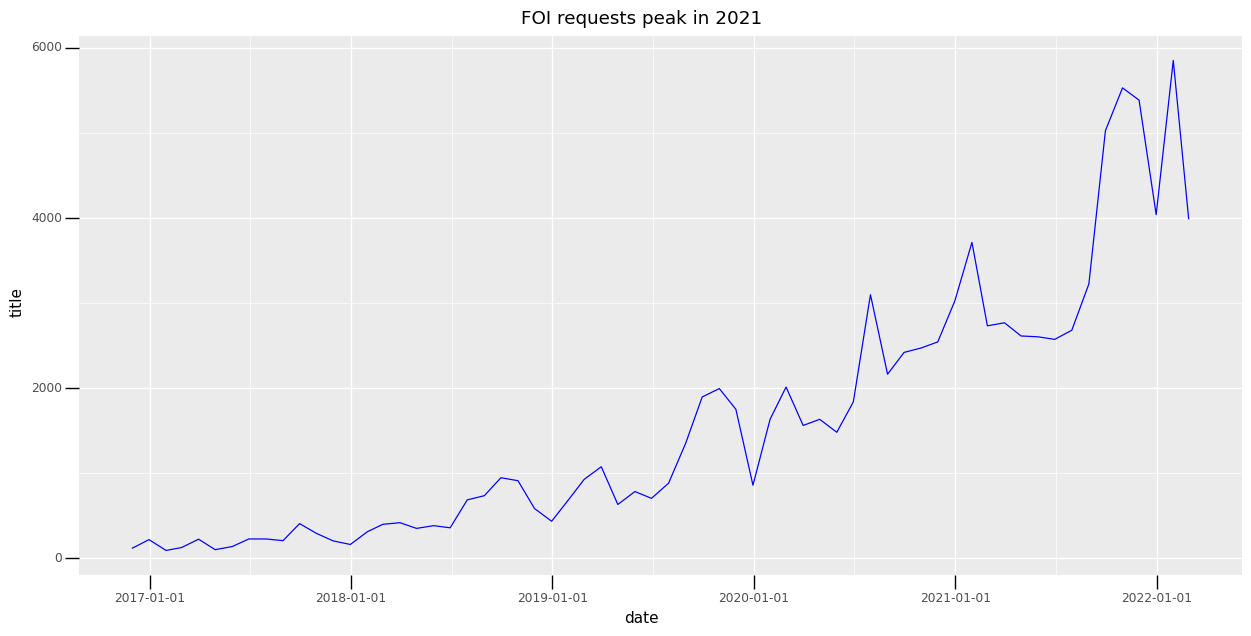

<ggplot: (303174452)>

In [26]:
(
    ggplot(month_query, aes(x="date", y="title")) + 
    geom_line(color="blue", stat="identity") + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="FOI requests peak in 2021")
)

In [27]:
df.resample('M', on='date').title.count().sort_values(ascending=False).head(10)
#Largest number of FOI requests recorded in December 2021.

date
2022-01-31    5848
2021-10-31    5526
2021-11-30    5382
2021-09-30    5023
2021-12-31    4037
2022-02-28    3982
2021-01-31    3711
2021-08-31    3223
2020-07-31    3097
2020-12-31    3024
Name: title, dtype: int64

### By year

In [28]:
year_query = df.resample('A', on='date').title.count().to_frame().reset_index()
year_query

,date,title
0,2016-12-31,337
1,2017-12-31,2418
2,2018-12-31,6530
3,2019-12-31,13554
4,2020-12-31,25874
5,2021-12-31,42865
6,2022-12-31,9830


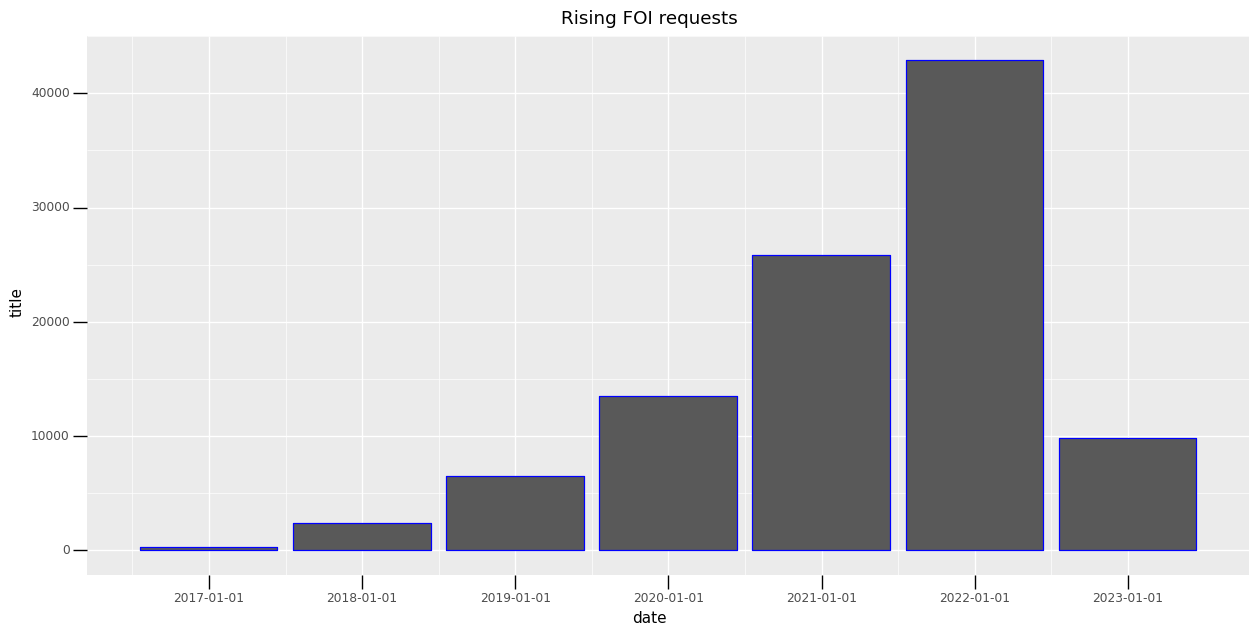

<ggplot: (303279744)>

In [29]:
(
    ggplot(year_query, aes(x="date", y="title")) + 
    geom_col(color="blue") + 
    theme(figure_size=(15,7), axis_ticks_length=10) + 
    labs(title="Rising FOI requests")
)

## Year-on-year change shows slowing down increase in FOI requests

In [30]:
df.resample('A', on='date').title.count().pct_change() * 100
#2016 started in September. 2022 as of few weeks of January.

date
2016-12-31           NaN
2017-12-31    617.507418
2018-12-31    170.057899
2019-12-31    107.565084
2020-12-31     90.895677
2021-12-31     65.668238
2022-12-31    -77.067538
Freq: A-DEC, Name: title, dtype: float64

# End.